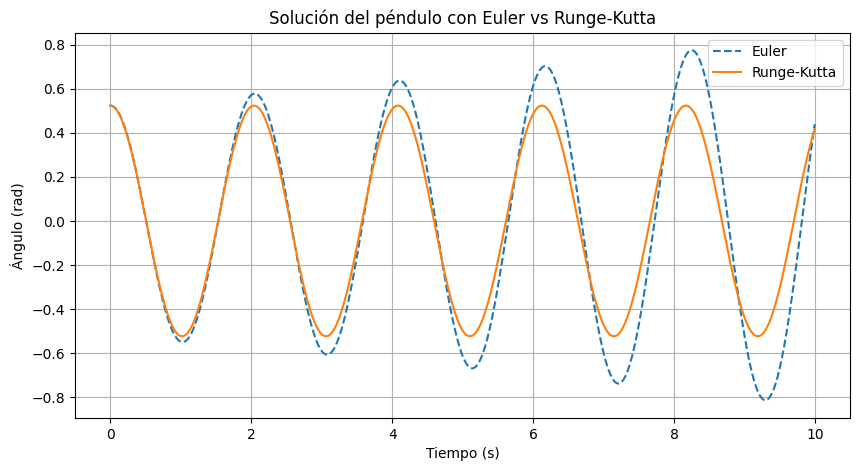

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del péndulo
g = 9.81  # Gravedad (m/s^2)
L = 1.0   # Longitud del péndulo (m)
dt = 0.01 # Paso de tiempo (s)
t_max = 10  # Tiempo total de simulación (s)

# Condiciones iniciales
theta_0 = np.radians(30)  # Ángulo inicial en radianes
omega_0 = 0.0  # Velocidad angular inicial

# Tiempo
t = np.arange(0, t_max, dt)

# ---------------- Método de Euler ----------------
theta_euler = np.zeros(len(t))
omega_euler = np.zeros(len(t))

theta_euler[0] = theta_0
omega_euler[0] = omega_0

for i in range(len(t) - 1):
    omega_euler[i + 1] = omega_euler[i] - (g / L) * np.sin(theta_euler[i]) * dt
    theta_euler[i + 1] = theta_euler[i] + omega_euler[i] * dt

# ---------------- Método de Runge-Kutta (RK4) ----------------
theta_rk = np.zeros(len(t))
omega_rk = np.zeros(len(t))

theta_rk[0] = theta_0
omega_rk[0] = omega_0

for i in range(len(t) - 1):
    k1_theta = omega_rk[i]
    k1_omega = - (g / L) * np.sin(theta_rk[i])

    k2_theta = omega_rk[i] + 0.5 * dt * k1_omega
    k2_omega = - (g / L) * np.sin(theta_rk[i] + 0.5 * dt * k1_theta)

    k3_theta = omega_rk[i] + 0.5 * dt * k2_omega
    k3_omega = - (g / L) * np.sin(theta_rk[i] + 0.5 * dt * k2_theta)

    k4_theta = omega_rk[i] + dt * k3_omega
    k4_omega = - (g / L) * np.sin(theta_rk[i] + dt * k3_theta)

    theta_rk[i + 1] = theta_rk[i] + (dt / 6) * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)
    omega_rk[i + 1] = omega_rk[i] + (dt / 6) * (k1_omega + 2*k2_omega + 2*k3_omega + k4_omega)

# ---------------- Gráficos ----------------
plt.figure(figsize=(10, 5))
plt.plot(t, theta_euler, label="Euler", linestyle="--")
plt.plot(t, theta_rk, label="Runge-Kutta", linestyle="-")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (rad)")
plt.title("Solución del péndulo con Euler vs Runge-Kutta")
plt.legend()
plt.grid()
plt.show()
